# Tech Challenge Fase 1

# Aluno
Klauber Lage - RM358972

# Tarefas
## 1 - Exploração de dados:

- (A) Carregue a base de dados e explore suas características.
- (B) Analise estatísticas descritivas e visualize distribuições relevantes.

## 2 - Pré-processamento de dados:
- (A) Realize   a   limpeza   dos   dados,   tratando   valores   ausentes (se necessário).
- (B) Converta   variáveis   categóricas   em   formatos   adequados   para modelagem.
- (C) Divida o conjunto de dados em conjuntos de treinamento e teste [1].
- (D) Crie  um modelo  preditivo  de  regressão utilizando uma técnica à  sua escolha (por exemplo, Regressão Linear, Árvores de Decisão etc) [1].
   - (1) Regressão Linear [2]
   - (2) Árvores de Decisão [2]

[1] Os itens C e D foram trocados de ordem para que o fluxo siga da meneira correta no código.
[2] Serão criados os dois modelos.

## 3 - Treinamento e avaliação do modelo:
- (A) Treine o modelo com o conjunto de treinamento.

## 4 - Validação estatística:
- (A) Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

## O que avaliaremos:
Apresente  resultados  visuais,  como  gráficos  de  previsões  vs.  valores reais.

Elabore  um  relatório  que  inclua  uma  análise  dos  resultados,  insights obtidos e validação estatística.

## Observações:
Esperamos que  o  modelo  seja  capaz  de  fazer  previsões  confiáveis  dos custos médicos individuais com base nas características fornecidas.

### Referência:
[Documento PDF do Desafio](POSTECH-TechChallenge-IADT-Fase1.pdf)

---



# Relatório 

# 0 - Instalação de dependências

In [ ]:
! pip install pandas pyarrow matplotlib seaborn statsmodels

In [ ]:
# Importando o pandas 
import pandas as pd

# Importando o matplot
import matplotlib.pyplot as plt

# Importando o Seaborn
import seaborn as sb

# Importando o statsmodel para o OLS
import statsmodels.api as sm

# 1 - Exploração de dados:

## (A) Carregue a base de dados e explore suas características

In [ ]:
# Usando o pandas para ler o conteúdo do arquivo CSV
dados = pd.read_csv('data/dados.csv')

# Mostrando os 10 primeiros itens da lista
dados.head(10)

Descrevendo os dados

In [ ]:
# Cada tópico significa:
'''
count: observações no grupo
mean: média das observações
std: desvio padrão
min: o valor mínimo
25%: 25% das observações estão abaixo do valor informado
50%: mediana
75%: 75% das observações estão abaixo do valor informado
max: o valor máximo é o informado
'''
# Descrevendo os dados
dados.describe()

# Também poderia descrever os dados de uma coluna em específico
#dados.groupby('gênero').describe()

Retornando informações do dataframe, como número de colunas, rótulos das colunas, tipos etc

In [ ]:
dados.info()

Retornando informações do dataframe na sequência de linhas e colunas

In [ ]:
# Retornando os dados do DataFrame na sequência (A, X), que significa:
''' 
A linhas: Há X registros ou observações no conjunto de dados.
X colunas: Cada registro ou observação tem X atributos ou características.
'''
dados.shape

Vemos que esse dataset possui 1338 linhas e 7 colunas. O que não é tanto para gerar um modelo bem treinado.

## (B) Analise estatísticas descritivas e visualize distribuições relevantes.

Usarei um gráfico para visualização geral das principais variáveis do dataset. Variáveis com dois valores (sim e não, masculino e feminino) e as regiões (sudeste, noroeste) não serão mostradas porque não são números.

In [ ]:
# Criando um histograma das variáveis
dados.hist(bins=50, figsize=(15,10))

Neste gráfico podemos entender sobre os nossos dados:

- Há uma concentração maior de pessoas com idade inferior a 20 anos.
- O IMC geral está concentrado entre os 25 e 35, sendo 30 o topo. Algo a ser melhor investigado.
- Existe um declínio no número de filhos, sendo o mais comum não terem filhos e o número máximo sendo 5.
- Os encargos gerais ficam entre o 2 (ou algo parecido) até 15 mil, sendo 65 mil o maior encargo.

Esses dados geram perguntas intrigantes sobre o que aumentam os encargos, então farei uma avaliação destes pontos a seguir.

Começarei verificando a distribuição dos encargos pelas faixas de idade:

In [ ]:
# Cria um gráfico tipo scatter (gráfico de dispersão) muito usado para visualizar relação entre duas variáveis númericas.
plt.scatter(dados['idade'], dados['encargos'])
# Adiciona o título ao gráfico
plt.title("Distribuição de encargos por idade")
# Adiciona 'label' horizontal
plt.xlabel("Idade")
# Adiciona 'label' vertical
plt.ylabel("Encargos")
# Mostra o gráfico
plt.show()

Mesmo embora haja uma concentração na idade em até 20 anos, os encargos sobem de acordo com a idade, o que significa que há uma correlação entre encargo e idade. Portanto a concentração da idade inferior há 20 anos para esse quesito é irrelevante. 

Continuarei explorando as outras variáveis e deixei para ver o peso dessa correlação logo mais.

Agora verificarei a distribuição de encargos entre fumantes e não fumantes:

In [ ]:
# Variáveis para separar os fumantes dos não fumantes. Ainda estão em sim e não porque não converti as variáveis categóricas.
fumantes = dados[dados['fumante'] == 'sim']
nao_fumantes = dados[dados['fumante'] == 'não']

# Histograma de fumandos e encargos
plt.hist(fumantes['encargos'], alpha=0.5, label='Fumantes', color='red')
plt.hist(nao_fumantes['encargos'], alpha=0.5, label='Não Fumantes', color='blue')

plt.xlabel('Encargos')
plt.ylabel('Frequência')
plt.title('Distribuição de Encargos por Fumantes vs Não Fumantes')
plt.legend(loc='upper right')

O gráfico mostra que os fumantes gastam mais com planos de saúde. O que creio ser um dado até que esperado, e isto leva a novas dúdivas como se gênero e idade influenciam na pessoa ser fumante ou não, porém como nosso foco é prever os encargos, continuarei explorando as outras variáveis.

Agora verificarei a distribuição de gastos por gênero:

In [ ]:
# Distribuição de gastos por gênero
plt.figure(figsize=(12, 6))
sb.boxplot(x='gênero', y='encargos', data=dados)
plt.title('Distribuição de Gastos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Encargos')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])

plt.show()

O gráfico mostra que, fora os outliers, o gasto feminino está concentrado entre os 5 mil e 15 mil. Para os homens, o gasto fica entre 5 e 20 mil, o que não é uma diferença muito grande, então o gênero não tem grande impacto nos encargos.

Seguindo na exploração das distribuições, agora verificarei a distribuição de IMC e sua frequência no dataset:

In [ ]:
# Criando um histograma da distribuição de massa 
plt.figure(figsize=(12, 6))
sb.histplot(dados["imc"], bins=70)  
plt.title('Distribuição de IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

# Média do IMC em números
media_imc = dados["imc"].mean()
print(f'Média do IMC: {media_imc}')

Como podemos perceber, a maioria das pessoas do dataset possuem IMC maior ou igual a 30. Vou usar uma tabela de IMC para verificar a categoria em que a média das pessoas se encaixam e posteriormente comparar os encargos dessa média:

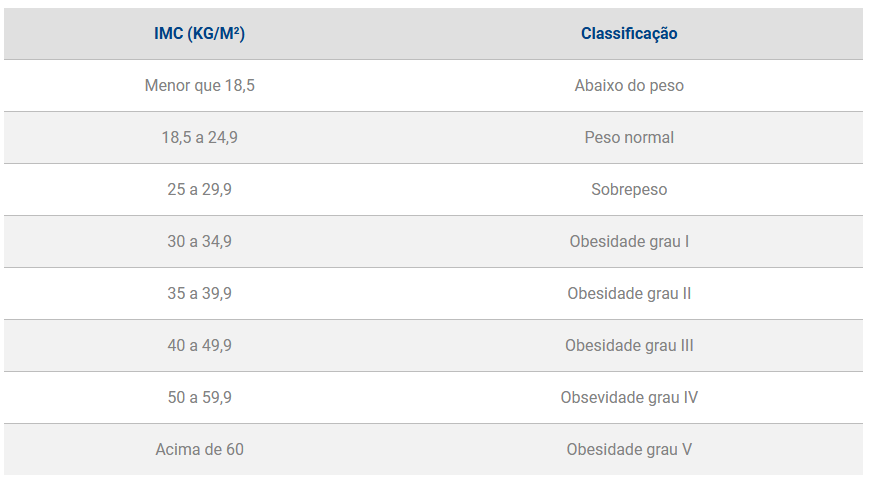

E de acordo com a tabela retirada do site da Rede D'or, significa que a maior parte das pessoas possui Obesidade grau 1. 

Agora verificarei a distribuição de encargos de acordo com as faixas de IMC:



In [ ]:
# Criando o histplot de encargos e IMC
plt.figure(figsize=(12, 6))
sb.histplot(dados, x='imc', y='encargos', cmap='coolwarm', cbar=True)
plt.title('Distribuição de Gastos por IMC')
plt.xlabel('IMC')
plt.ylabel('Encargos')

plt.show()

Mesmo tendo muito peso no dataset, afinal a média de IMC é 30, que como vimos é obesidade, o grau de obesidade parece não ter influência diretamente nos encargos. 

Farei um gráfico aprofundado comparando a frequência dos encargos pela média de IMC:

In [ ]:
# Criando o histograma de comparação de frequência
plt.hist(dados[dados['imc'] >= 30]['encargos'], alpha=0.5, label='IMC maior ou igual a 30', color='red')
plt.hist(dados[dados['imc'] < 30]['encargos'], alpha=0.5, label='IMC menor 30', color='blue')

plt.xlabel('Encargos')
plt.ylabel('Frequência')
plt.title('Frequência de Encargos por Categoria de IMC')
plt.legend(loc='upper right')

plt.show()

Agora com o gráfico nos leva a crer que a correlação entre IMC e os encargos tenha algum peso, mesmo que não considerável. Continuarei explorando a última variável não categórica, que é a distribuição de gastos por números de filhos:

In [ ]:
# Criando um boxplot para verificar a dsitribução de gastos por números de filhos
plt.figure(figsize=(12, 6))
sb.boxplot(x='filhos', y='encargos', data=dados)
plt.title('Distribuição de Gastos por número de filhos')
plt.xlabel('Filhos')
plt.ylabel('Encargos')

Não fica claro se o número de filhos aumenta os encargos (embora pudesse parecer lógico que quanto mais filhos, maiores os encargos).

A princípio, de todas as variáveis, ser fumante é o que possui maior correlação com encargos. Demais variáveis podem ter alguma correlação, porém com menor peso. Continuarei explorando as correlações, mas agora depois de converter as variáveis categóricas. Para isto continuarei o processo.

---

# 2 - Pré-processamento de dados:
## (A) Realize   a   limpeza   dos   dados,   tratando   valores   ausentes (se necessário).

Começarei verificando se há valores nulos:

In [ ]:
# Exemplo de tratamento de valores ausentes
#dados = dados.ffill()
#dados.fillna(method='ffill') Foi depreciado

# Verificando se há dados nulos
dados.isnull().sum()

Como não há valores nulos, podemos pular esta etapa.

## (B) Converta   variáveis   categóricas   em   formatos   adequados   para modelagem.

Converterei as variáveis categóricas para que seja possível treinar o modelo.

In [ ]:
# Pré-processamento
from sklearn.calibration import LabelEncoder

label_encoder = LabelEncoder()

# Estou criando uma cópia porque quero usar os dados puros em outro momento
dados_transformados = dados.copy()

# Ajustando e transformando os rótulos
dados_transformados['gênero'] = label_encoder.fit_transform(dados['gênero'])
print("Classes de 'gênero':", label_encoder.classes_)

dados_transformados['fumante'] = label_encoder.fit_transform(dados['fumante'])
print("Classes de 'fumante':", label_encoder.classes_)

dados_transformados['região'] = label_encoder.fit_transform(dados['região'])
print("Classes de 'região':", label_encoder.classes_)

# Verificando os dados após a conversão
dados_transformados.head(10)


De acordo com o código acima, as variáveis gênero, fumante e região foram categorizadas da seguinte forma:

- gênero: 'feminino' = 0, 'masculino' = 1
- fumante: 'não' = 0, 'sim' = 1
- região: 'nordeste' = 0, 'noroeste' = 1,  'sudeste' = 2, 'sudoeste' = 3

Após converter as variáveis categóricas, é possível visualizarmos a correlação entre os dados, para tanto farei de duas formas. Sendo a primeira usando o método .corr() do pandas, e o segundo um gráfico de correlação do matplotlib.

In [ ]:
# Correlação entre os dados
corr = dados_transformados.corr()
corr

In [ ]:
#Gráfico da correlação
ax, ya = plt.subplots(figsize=(12, 7))

sb.heatmap(corr, annot=True, linewidths=.5)

A correlação nos mostra que o que trás mais impacto para os encargos é a pessoa ser fumante, que vai de encontro com o que exploramos anteriormente. Também, como havíamos identificado, o IMC tem pouca relevância, mesmo tendo tanto impacto no dataset, além do número de filhos pouco influenciar nos encargos. A idade apresenta uma correlação moderada, o que é um fator relevante, mesmo que pouco. 

As outras variáveis (região e gênero) que não validamos por serem categóricas naquele momento não apresentam peso nos encargos. 

Por fim, é interessante notarmos que, também conforme mencionado mas que não exploraríamos, existe uma correlação entre gênero e fumante e até imc e região/ idade.

Como já exploramos nosso dataset e entendemos os pesos das variáveis, é hora de treinar o modelo.

## (C) Divida o conjunto de dados em conjuntos de treinamento e teste.

Começarei usando o drop do pandas para remover a coluna de encargos do dataframe (dataset), já que é o que queremos prever. Estou usando o axis=1 para remover toda a coluna do dataframe. 

Logo em seguida farei o treinamento dos subconjuntos de treinamento e teste, sendo 80% para treino e 20% para teste.

In [ ]:
from sklearn.model_selection import train_test_split

x = dados_transformados.drop(columns=['encargos'], axis=1)
y = dados_transformados['encargos']

# train_test_split: Essa função divide arrays ou matrizes em subconjuntos de treinamento e teste de forma aleatória.
# x_train: Variáveis feature
# x_test: Variáveis feature
# y_train: Variável target
# y_test: Variável target
# x:
# y test_size: Tamanho do teste
# stratify: Direciona o equilibrio dos dados, equilibrando as amostras. 
# random_state: Distribui de forma aleatória os dados
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Vou explorar rapidamente o total das bases de treinamento e teste:

In [ ]:
print("Conjunto de treinamento:")
print(x_train)
print(y_train)


In [ ]:
print("\nConjunto de teste:")
print(x_test)
print(y_test)

print("")
print("Total das bases: ")
print("Total base de treino: ", len(x_train))
print("Total base de teste: ", len(y_test))

## (D) Crie  um modelo  preditivo  de  regressão utilizando uma técnica à  sua escolha (por exemplo, Regressão Linear, Árvores de Decisão etc)

Agora com os conjuntos de treinamento e teste criados, vamos criar o modelo. Utilizarei o modelo de regressão linear por ser o primeiro introduzido e por ter mais exemplos nas aulas:

In [ ]:
from sklearn.linear_model import LinearRegression

# Criando o modelo de Regressão Linear
modelo = LinearRegression()

---

# 3 - Treinamento e avaliação do modelo:
## (A) Treine o modelo com o conjunto de treinamento.



Usando o método fit do sklearn para treinar o modelo, usando os dados de treinamento conforme visto acima.

In [ ]:
modelo.fit(x_train, y_train)

---

# 4 - Validação estatística:
## (A) Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

Com o modelo devidamente treinado, vamos explorar as métricas para verificarmos a qualidade do nosso treinamento.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(x_test)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# MSE é a diferença média entre os valores previstos e os valores reais. MSE menor indica um modelo mais preciso.
print(f'Mean Squared Error: {mse}')

# MAE é a média do valor absoluto dos erros.
print('MAE:', mae)

# R² mede a proporção da variância nos dados dependentes que é previsível a partir das variáveis independentes. Um R² próximo de 1 indica um modelo que explica bem a variância dos dados.
print(f'R^2 Score: {r2}')

Vamos explorar os resultados individualmente:

MSE: Mean Squared Error é a diferença média entre os valores previstos e os valores reais. Um valor de MSE menor indica um modelo mais preciso. Então se um valor menor indica que o modelo é mais preciso, o valor atual significa que há uma diferença considerável entre os valores previstos e os valores reais. 

MAE: Mean Absolute Error é a média do valor absoluto dos erros. Como ele mede a média entre o valor previsto e o valor real, quanto menor o valor melhor, porque o valor estará mais próximo do valor real. Sendo então que o modelo está errando em 4186 dólares nos encargos.

R^2: Sendo uma das principais métricas, o coeficiente de determinação que explica o quão bem o modelo explica a variação dos dados. Sendo 1 o topo, onde o modelo explica toda a variação dos dados, o que é problemático porque é como se ele estivesse somente gravando os dados, e 0 onde o modelo não explica nenhuma variação. No caso, 0.78 não é o pior valor, porém indica que o modelo pode ser melhorado.

Vamos ver o gráfico de previsão de encargos vs o valor real dos encargos:

In [ ]:
# Gráfico de Previsão de Encargos vs Valor Real
plt.scatter(y_test, y_pred, label='Previsto', color='red',)
plt.scatter(y_test, y_test, label='Real')
plt.xlabel('Encargo Real')
plt.ylabel('Encargo Previsto')
plt.title('Previsão vs Valor Real')
plt.legend()

 Podemos perceber que a previsão erra, provavelmente baseado no valor do MAE, mas mesmo com erro mantêm-se seguindo a reta linear, exceto pela casa dos 20 a 35 e acima 60 mil, onde há uma grande distância entre a previsão e o valor real, talvez ocasionado por algum outlier.

 Com esse resultado vemos que o modelo precisa ser melhorado, porém já mostra resultados significativos.

In [ ]:
print('Intercepto:', modelo.intercept_)

Primeiramente, intercepto é valor de y (variável independente - features, todas as outras exceto encargos) quando x (variável dependente - target, que neste caso é encargos) é 0. 

O valor do intercepto tão negativo pode ser explicado pela falta de padronização dos dados. O que me vêm em mente é a grande diferença nas escalas das variáveis.

Agora verificarei a relação de coeficientes entre as variáveis independentes (feature = filhos, idade, gênero, região, fumante) e a variável dependente (target = encargos)

In [ ]:
# Criando tabela de coeficientes
coeff_df = pd.DataFrame(modelo.coef_,x.columns,columns=['Coeficiente'])
coeff_df

Com a tabela percebemos que fumante é o que realmente mais trás impacto nos encargos, como já havíamos previsto. Depois de fumante temos filhos, imc e idade. Nessa lista o que mais chama a atenção é a quantidade de filhos, que inicialmente teve sua importância questionada. IMC e idade já haviamos previsto de alguma forma. Região não teve impacto, mas como não foram usadas variáveis dummy, não há como explicitamente definir se a região tem impacto positivo ou negativo. 

Agora avaliaremos o resultado do p-value.

In [ ]:
# Criando modelo para avaliação do p-value
modelo_ols = sm.OLS(y_train, x_train).fit()

y_p_pred = modelo_ols.predict(x_test)

print(modelo_ols.summary())

O p-value é uma probabilidade que indica se a diferença observada nos dados é real ou se poderia ter acontecido por acaso. Para isto, o p-value usa a hipótese nula, que é uma suposição inicial que diz que não há efeito ou relação entre as variáveis independentes x  e a variável dependente y.

Quanto menor o p-value, menor é a probabilidade da diferença observada ter ocorrido por acaso, portanto podemos rejeitar a hipótese nula. Se o p-value for grande, isso significa que a diferença observada pode ter ocorrido por acaso, então provavelmente não poderemos rejeitar a hipótese nula.

Assim sendo, os valores de P>|t| (p-value):
- idade: 0.000, o valor está zerado, isso indica que a idade tem um efeito significativo nos encargos, portanto a hipótese (nula) de que a idade não tem efeito é rejeitada.

- gênero: 0.084, o valor é médio (acima de 0.5), isso indica que o gênero não tem efeito significativo nos encargos, portanto **não há evidências suficientes** para rejeitar a hipótese nula.

- imc: 0.003, o valor é quase zero absoluto, isso indica que o imc tem  efeito significativo nos encargos, portanto a hipótese nula é rejeitada.

- filhos: 0.222, o valor é o maior da lista e está um pouco alto, isso indica que o número de filhos não tem um efeito significativo nos encargos, assim **não há evidências suficientes** para rejeitar a hipótese nula.

- fumante: 0.000, o valor também está zerado, isso indica que ser fumante tem um efeito significativo nos encargos, portanto a hipótese nula é rejeitada.

- região:  0.012, o valor não é zero absoluto mas é bem baixo, isso indica que a região tem um efeito significativo nos encargos. A hipótese nula é rejeitada.    

Os valores de p-value levantam questões interessantes como a região possuir algum valor significativo, que não apareceu no coeficiente, o que faz questionar o treinamento do modelo e talvez a falta de padronização e uso de dummies no treinamento.


Antes da conclusão testarei a padronização dos dados e a criação de variáveis dummy. Como estou apenas transformando as variáveis 'região' e 'gênero', talvez o valor real dessas variáveis esteja sendo ignorado. Por praticidade, colocarei o código em somente um bloco:

In [ ]:
from sklearn.discriminant_analysis import StandardScaler

dados_dummy = pd.get_dummies(dados, columns=['gênero', 'fumante', 'região'], drop_first=True)

x_dummy = dados_dummy.drop(columns=['encargos'], axis=1)
y_dummy = dados_dummy['encargos']

x_dummy_train, x_dummy_test, y_dummy_train, y_dummy_test = train_test_split(x_dummy, y_dummy, test_size=0.20, random_state=42)

scaler = StandardScaler()
x_dummy_train_scaled = scaler.fit_transform(x_dummy_train)
x_dummy_test_scaled = scaler.transform(x_dummy_test)

modelo_dummy = LinearRegression()
modelo_dummy.fit(x_dummy_train_scaled, y_dummy_train)

y_dummy_pred = modelo_dummy.predict(x_dummy_test_scaled)

mse_dummy = mean_squared_error(y_dummy_test, y_dummy_pred)
mae_dummy = mean_absolute_error(y_dummy_test, y_dummy_pred)
r2_dummy = r2_score(y_dummy_test, y_dummy_pred)

print(f'Mean Squared Error: {mse_dummy}')
print('MAE:', mae_dummy)
print(f'R^2 Score: {r2_dummy}')

Agora uma visualização da tabela de correlação entre os dados com as variáveis dummy:

In [ ]:
# Correlação entre os dados
corr_dummy = dados_dummy.corr()

#Gráfico da correlação
ax, ya = plt.subplots(figsize=(12, 7))

sb.heatmap(corr_dummy, annot=True, linewidths=.5)

Como podemos perceber, não houve grande melhoria no MSE, MAe e R^2, porém agora nos coeficientes e no p-value temos o gênero e as regiões separadas, o que nos permite ter uma visão mais abrangente 

In [ ]:
print('Intercepto:', modelo_dummy.intercept_)

Como dito anteriormente, o valor do intercepto agora é positivo, provavelmente porque as grandezas foram ajustadas, já que o StandardScaler normaliza a escala das variáveis.

In [ ]:
# Gráfico de Previsão de Encargos vs Valor Real
plt.scatter(y_dummy_test, y_dummy_pred, label='Previsto', color='red',)
plt.scatter(y_dummy_test, y_dummy_test, label='Real')
plt.xlabel('Encargo Real')
plt.ylabel('Encargo Previsto')
plt.title('Previsão vs Valor Real')
plt.legend()

O gráfico de previsão vs valor real se manteve igual, o que me deixa pensativo na causa.

In [ ]:
# Adicionei .astype(float) para resolver um erro de dtype, conforme pergunta do Stack Overflow: https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o
modelo_ols_dummy = sm.OLS(y_dummy_train, x_dummy_train.astype(float)).fit()

y_dummy_p_pred = modelo_ols_dummy.predict(x_dummy_train)

print(modelo_ols_dummy.summary())

----


# Conclusão

Neste tech-challenge realizei uma análise detalhada de um conjunto de dados de encargos médicos retirado do site Kaggle, passando por etapas de exploração, pré-processamento, modelagem e avaliação de modelos preditivos. 

Usei o modelo de regressão linear para prever os encargos médicos. Após todo a fase de exploração, pré-processamento dos dados, a modelagem do modelo e das validações estástisticas, a conslusão que os resultados indicam é que o hábito de fumar é o fator mais influente nos encargos médicos, seguido pela idade e IMC.

Separei o teste em uma versão sem padronização e utilização de variáveis dummy, e outro passando por estes processos, mas não houve grande evolução fora o intercepto, que naturalmente iria ser ajustado devido às novas dimensões, e a possibilidade de entendimento do gênero e regiões nos encargos individualmente.

Embora os modelos apresentem um desempenho razoável, há espaço para novos testes, como a exploração de outras técnicas de modelagem, como Árvore de Decisão (Decision Tree) ou Floresta Aleatória (Random Forest) para aumentar a precisão das previsões.

Por fim, tentei explorar as técnicas aprendidas para melhorar a robustez dos resultados. Acredito que tratar os outliers e ter um dataset maior ajude a ter melhor compressão das relações e até eventualmente melhorar a qualidade final do modelo.
